In [1]:
from rdflib import Graph, URIRef, Literal, Namespace

g = Graph()
g.parse("C:/Users/patel/Downloads/XAI_MINI_PROJECT/data/AIFB/raw/aifb-hetero/aifbfixed_complete.n3", format="n3")

<Graph identifier=N18d9bdfbf1b04546aac20b62c4d8cc76 (<class 'rdflib.graph.Graph'>)>

In [2]:
import pandas as pd

train_df = pd.read_csv("C:/Users/patel/Downloads/XAI_MINI_PROJECT/data/AIFB/raw/aifb-hetero/trainingSet.tsv", sep="\t")
train_df = train_df.rename(columns={
    "person": "entity",
    "label_affiliation": "label"
})

# Optional: Drop the "id" column since it's not needed
train_df = train_df.drop(columns=["id"])

# Final check
print(train_df.head(10))



                                              entity  \
0  http://www.aifb.uni-karlsruhe.de/Personen/view...   
1  http://www.aifb.uni-karlsruhe.de/Personen/view...   
2  http://www.aifb.uni-karlsruhe.de/Personen/view...   
3  http://www.aifb.uni-karlsruhe.de/Personen/view...   
4  http://www.aifb.uni-karlsruhe.de/Personen/view...   
5  http://www.aifb.uni-karlsruhe.de/Personen/view...   
6  http://www.aifb.uni-karlsruhe.de/Personen/view...   
7  http://www.aifb.uni-karlsruhe.de/Personen/view...   
8  http://www.aifb.uni-karlsruhe.de/Personen/view...   
9  http://www.aifb.uni-karlsruhe.de/Personen/view...   

                                               label  
0  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
1  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
2  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
3  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
4  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
5  http://www.aifb.uni-karlsruhe.de/Forschungsgru... 

In [3]:
print(len(train_df))  # total number of rows (entities) in training set
print(train_df["label"].nunique())  # number of unique classes (research groups)
print(train_df["label"].value_counts())


140
4
label
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance    58
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance    48
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance    22
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance    12
Name: count, dtype: int64


In [4]:
literal_predicates_set = set()
for s, p, o in g:
    if isinstance(o, Literal):
        literal_predicates_set.add(str(p))

# Print all unique literal predicates
print("Literal predicates found in RDF file:")
for pred in sorted(literal_predicates_set):
    print(pred)
        
# we can confirm the literal predicates matches the literal predicates from sparql analysis

Literal predicates found in RDF file:
http://swrc.ontoware.org/ontology#abstract
http://swrc.ontoware.org/ontology#address
http://swrc.ontoware.org/ontology#booktitle
http://swrc.ontoware.org/ontology#chapter
http://swrc.ontoware.org/ontology#edition
http://swrc.ontoware.org/ontology#fax
http://swrc.ontoware.org/ontology#homepage
http://swrc.ontoware.org/ontology#howpublished
http://swrc.ontoware.org/ontology#isbn
http://swrc.ontoware.org/ontology#journal
http://swrc.ontoware.org/ontology#month
http://swrc.ontoware.org/ontology#name
http://swrc.ontoware.org/ontology#note
http://swrc.ontoware.org/ontology#number
http://swrc.ontoware.org/ontology#pages
http://swrc.ontoware.org/ontology#phone
http://swrc.ontoware.org/ontology#photo
http://swrc.ontoware.org/ontology#series
http://swrc.ontoware.org/ontology#title
http://swrc.ontoware.org/ontology#type
http://swrc.ontoware.org/ontology#volume
http://swrc.ontoware.org/ontology#year
http://www.aifb.uni-karlsruhe.de/WBS/dvr/owltools/merge/type


In [5]:
test_df = pd.read_csv("C:/Users/patel/Downloads/XAI_MINI_PROJECT/data/AIFB/raw/aifb-hetero/testSet.tsv", sep="\t")
test_df = test_df.rename(columns={
    "person": "entity",
    "label_affiliation": "label"
})

# Optional: Drop the "id" column since it's not needed
test_df = test_df.drop(columns=["id"])

# Final check
print(test_df.head(10))
#renaming the columns and dropping the index column in the testdata as well

                                              entity  \
0  http://www.aifb.uni-karlsruhe.de/Personen/view...   
1  http://www.aifb.uni-karlsruhe.de/Personen/view...   
2  http://www.aifb.uni-karlsruhe.de/Personen/view...   
3  http://www.aifb.uni-karlsruhe.de/Personen/view...   
4  http://www.aifb.uni-karlsruhe.de/Personen/view...   
5  http://www.aifb.uni-karlsruhe.de/Personen/view...   
6  http://www.aifb.uni-karlsruhe.de/Personen/view...   
7  http://www.aifb.uni-karlsruhe.de/Personen/view...   
8  http://www.aifb.uni-karlsruhe.de/Personen/view...   
9  http://www.aifb.uni-karlsruhe.de/Personen/view...   

                                               label  
0  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
1  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
2  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
3  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
4  http://www.aifb.uni-karlsruhe.de/Forschungsgru...  
5  http://www.aifb.uni-karlsruhe.de/Forschungsgru... 

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [7]:
all_entities = pd.concat([train_df, test_df], ignore_index=True)
# combining entities of each train and test set to get the corresponding literal features of their entities

In [8]:
SWRC = Namespace("http://swrc.ontoware.org/ontology#")
LITERAL_PREDS = {
    SWRC.name,
    SWRC.title,
    SWRC.series,
    SWRC.abstract,
    SWRC.edition,
    SWRC.month,
    SWRC.phone,
    SWRC.pages,
    SWRC.year,
    SWRC.journal,
    SWRC.booktitle,
    SWRC.photo,
    SWRC.address,
    SWRC.type,
    SWRC.number,
    SWRC.homepage,
    SWRC.volume,
    SWRC.fax,
    SWRC.howpublished,
    SWRC.note,
    SWRC.chapter,
    SWRC.isbn
}
# list of literals gathered from sparql also confirmed

In [9]:
merge_type = URIRef("http://www.aifb.uni-karlsruhe.de/WBS/dvr/owltools/merge/type")

for s, p, o in g.triples((None, merge_type, None)):
    print(f"{s} -> {o} ({type(o)})")
    break

http://www.aifb.uni-karlsruhe.de/Forschungsgebiete/viewForschungsgebietOWL/id100instance -> http://swrc.ontoware.org/ontology#ResearchTopic (<class 'rdflib.term.Literal'>)


In [10]:
# extracting the literal features for each instance from all_entities
data = []
for _, row in all_entities.iterrows():
    entity_uri = URIRef(row["entity"])
    label = row["label"]

    row_dict = {"entity": str(entity_uri), "label": label}

    for pred in LITERAL_PREDS:
        obj = g.value(subject=entity_uri, predicate=pred)
        row_dict[str(pred)] = str(obj) if isinstance(obj, Literal) else None

    data.append(row_dict)

In [11]:
#creating a dataframe
df = pd.DataFrame(data)

In [12]:
#simplifying column name
df.columns = [col.split("#")[-1] if "#" in col else col for col in df.columns]

In [13]:
print(df)

                                                entity  \
0    http://www.aifb.uni-karlsruhe.de/Personen/view...   
1    http://www.aifb.uni-karlsruhe.de/Personen/view...   
2    http://www.aifb.uni-karlsruhe.de/Personen/view...   
3    http://www.aifb.uni-karlsruhe.de/Personen/view...   
4    http://www.aifb.uni-karlsruhe.de/Personen/view...   
..                                                 ...   
171  http://www.aifb.uni-karlsruhe.de/Personen/view...   
172  http://www.aifb.uni-karlsruhe.de/Personen/view...   
173  http://www.aifb.uni-karlsruhe.de/Personen/view...   
174  http://www.aifb.uni-karlsruhe.de/Personen/view...   
175  http://www.aifb.uni-karlsruhe.de/Personen/view...   

                                                 label title volume journal  \
0    http://www.aifb.uni-karlsruhe.de/Forschungsgru...  None   None    None   
1    http://www.aifb.uni-karlsruhe.de/Forschungsgru...  None   None    None   
2    http://www.aifb.uni-karlsruhe.de/Forschungsgru...  None   Non

In [14]:
# Encoding labels of all instances in data
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

In [15]:
# Splitting into training and testing including the labels and features from df
train_entities = set(train_df["entity"])
test_entities = set(test_df["entity"])

train_data = df[df["entity"].isin(train_entities)].copy()
test_data = df[df["entity"].isin(test_entities)].copy()


In [16]:
# Splitting features and labels, only features column for training and only label column as target in test
X_train = train_data.drop(columns=["entity", "label"])
y_train = train_data["label"]
X_test = test_data.drop(columns=["entity", "label"])
y_test = test_data["label"]

In [17]:
# One-hot encoding categorical features for the x of the original trainset and testingset
categorical_cols = X_train.select_dtypes(include="object").columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
X_train_enc = encoder.fit_transform(X_train[categorical_cols])
X_test_enc = encoder.transform(X_test[categorical_cols])

X_train_enc_df = pd.DataFrame(X_train_enc, columns=encoder.get_feature_names_out(categorical_cols))
X_test_enc_df = pd.DataFrame(X_test_enc, columns=encoder.get_feature_names_out(categorical_cols))

In [47]:
# Training the model on the random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_enc_df, y_train)


RandomForestClassifier(random_state=42)

In [48]:
# Evaluating by comparing predictions(y_pred) made by the model on the instances of the testset with the labels of the testset
y_pred = clf.predict(X_test_enc_df)
print(classification_report(y_test, y_pred, target_names=le.classes_))

                                                                                        precision    recall  f1-score   support

http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance       1.00      0.87      0.93        15
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance       1.00      0.17      0.29         6
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance       0.60      1.00      0.75        12
http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance       0.50      0.33      0.40         3

                                                                              accuracy                           0.75        36
                                                                             macro avg       0.78      0.59      0.59        36
                                                                          weighted avg       0.82     

In [38]:
# the encoded predicted labels for each instance from the testset
print(y_pred) 

[0 2 2 2 0 2 0 0 0 0 0 0 2 0 2 0 2 1 2 2 2 0 2 2 2 2 2 2 3 2 0 2 3 0 2 2]


In [8]:
import joblib

In [46]:
#saving the trained model
joblib.dump(clf, "rf_model.pkl")

['rf_model.pkl']

In [21]:
import matplotlib.pyplot as plt

In [49]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_enc_df)

# Loop through each class
for i, class_name in enumerate(le.classes_):
    print(f"\nSHAP Summary for class: {class_name}")

    shap_vals = shap_values[i]

    # Sanity check to ensure the shape matches the number of features
    if shap_vals.shape[1] != X_test_enc_df.shape[1]:
        print(f"Warning: Mismatch in shape for class {class_name}")
        print(f"shap_vals shape: {shap_vals.shape}, X_test shape: {X_test_enc_df.shape}")
        continue  # skip this class

    # Plot
    shap.summary_plot(
        shap_vals,
        X_test_enc_df,
        feature_names=X_test_enc_df.columns,
        max_display=20
    )
# since our shap values is multiclass we need to transpose it first



SHAP Summary for class: http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id1instance
shap_vals shape: (380, 4), X_test shape: (36, 380)

SHAP Summary for class: http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id2instance
shap_vals shape: (380, 4), X_test shape: (36, 380)

SHAP Summary for class: http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id3instance
shap_vals shape: (380, 4), X_test shape: (36, 380)

SHAP Summary for class: http://www.aifb.uni-karlsruhe.de/Forschungsgruppen/viewForschungsgruppeOWL/id4instance
shap_vals shape: (380, 4), X_test shape: (36, 380)


In [50]:
#understanding the shap values
import numpy as np
print(type(shap_values))
print(np.shape(shap_values))


<class 'numpy.ndarray'>
(36, 380, 4)


In [51]:
#reshapping the shap_values
shap_values = shap_values.transpose((2, 0, 1))  # → (n_classes, n_samples, n_features)


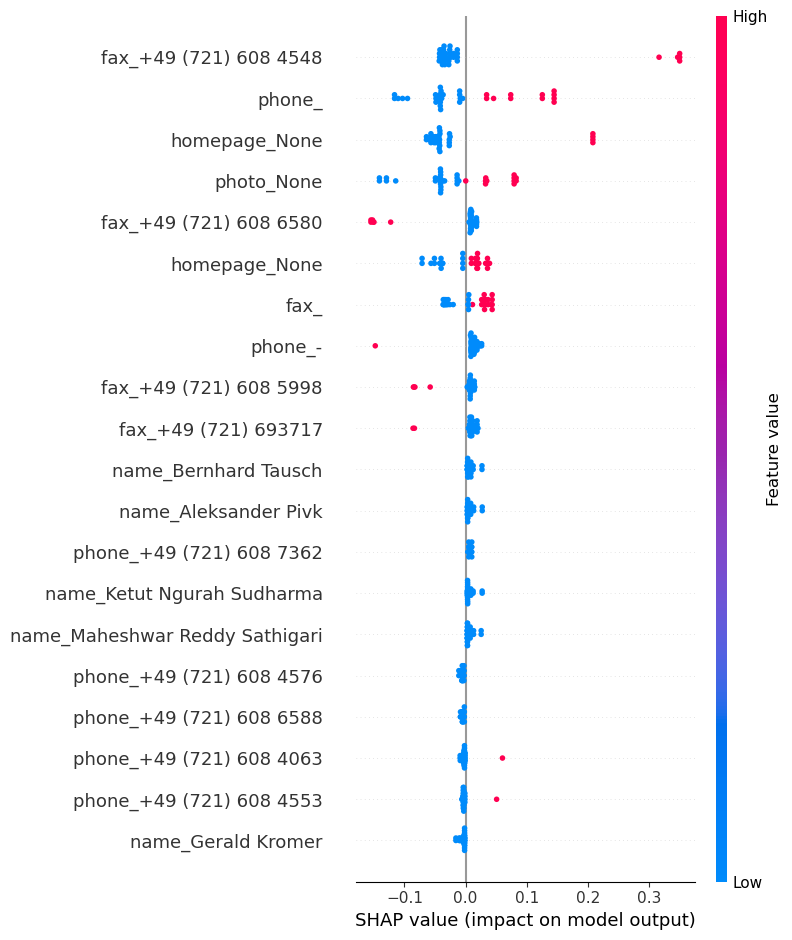

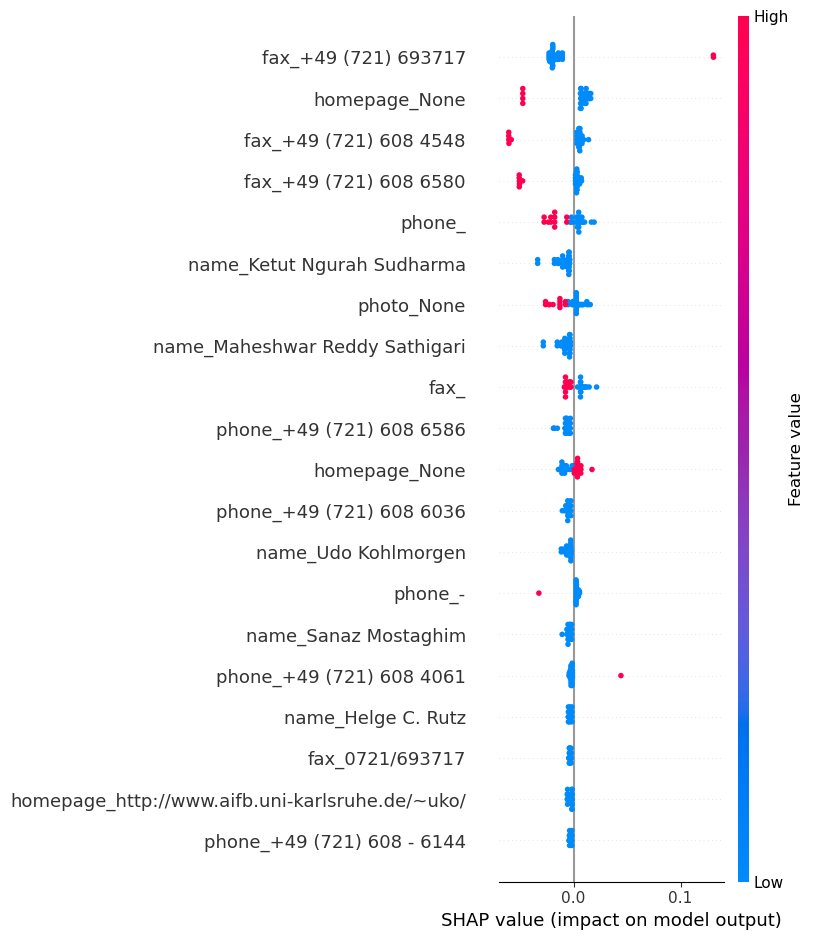

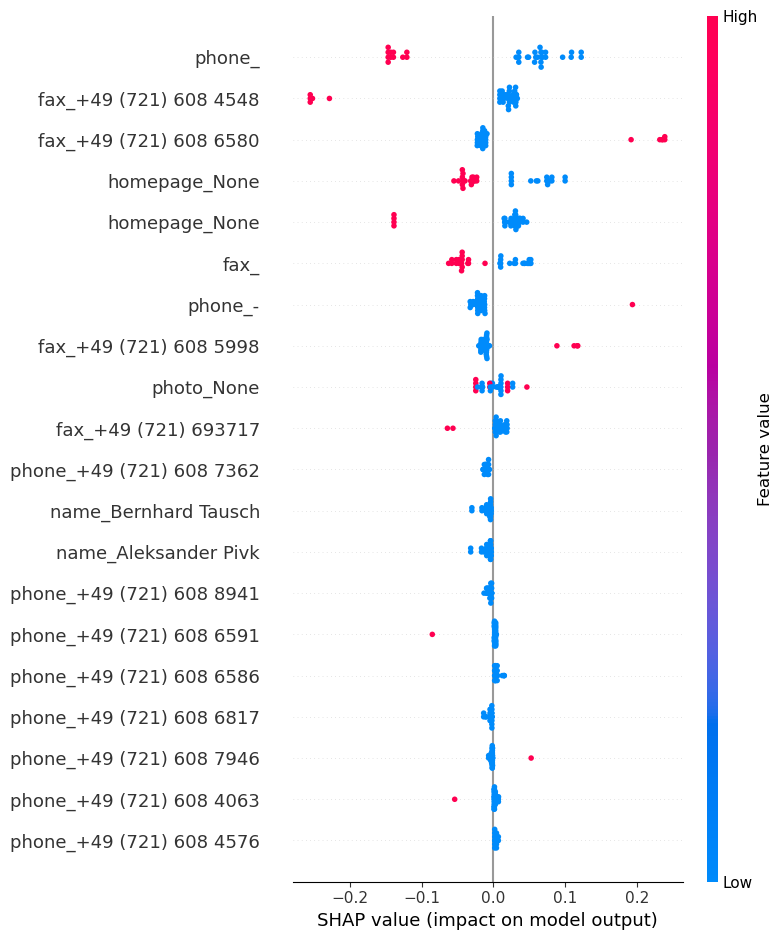

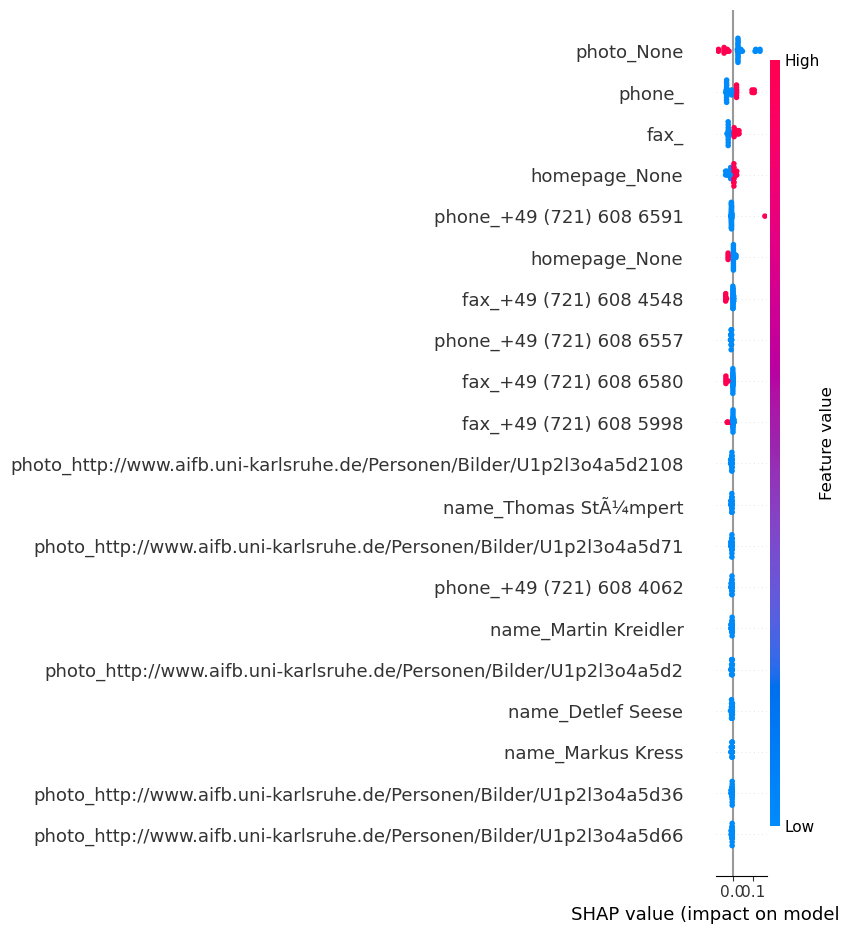

In [56]:
import re
for i, class_name in enumerate(le.classes_):  # le.classes_ = your label encoder classes
    shap.summary_plot(shap_values[i], X_test_enc_df, feature_names=X_test_enc_df.columns)
    


In [52]:
feature_names = X_test_enc_df.columns
mean_abs_shap = np.abs(shap_values).mean(axis=(0, 1))  # → shape: (num_features,)

# Create DataFrame of feature importance
shap_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Mean |SHAP value|": mean_abs_shap
}).sort_values("Mean |SHAP value|", ascending=False)

# Display top 20 most important features
shap_importance_df.head(20)

,Feature,Mean |SHAP value|
123,phone_,0.049180
109,fax_+49 (721) 608 4548,0.036904
196,homepage_None,0.032079
96,photo_None,0.030642
111,fax_+49 (721) 608 6580,0.025471
232,homepage_None,0.024095
98,fax_,0.023379
115,fax_+49 (721) 693717,0.013353
187,phone_-,0.012020
110,fax_+49 (721) 608 5998,0.011627


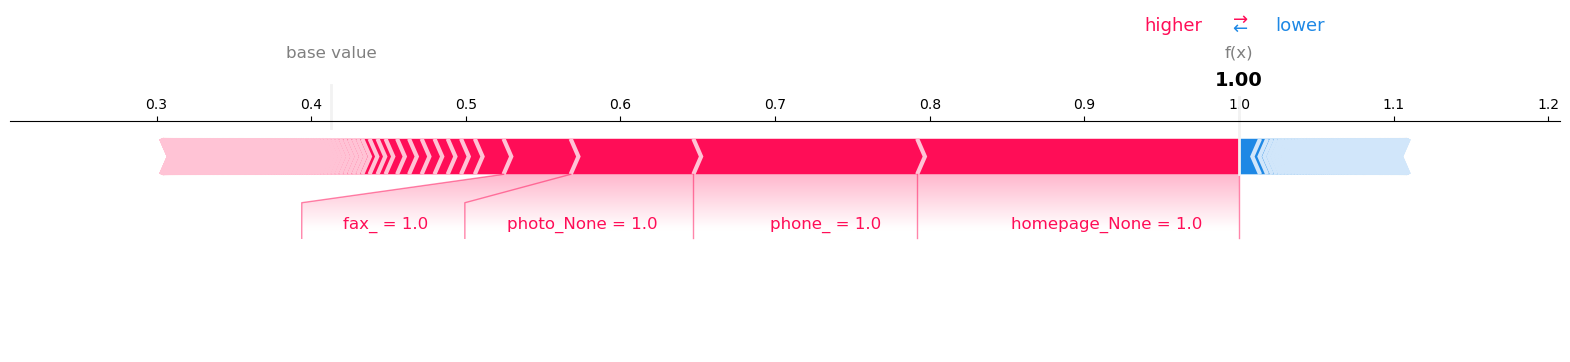

In [53]:
shap.initjs()
instance_idx = 0
instance_to_explain = X_test_enc_df.iloc[instance_idx]
class_index = 0  # change this for other classes
shap.force_plot(
    explainer.expected_value[class_index], 
    shap_values[class_index][instance_idx], 
    instance_to_explain,
    matplotlib=True  # use JS=False fallback for PNG instead of interactive JS
)

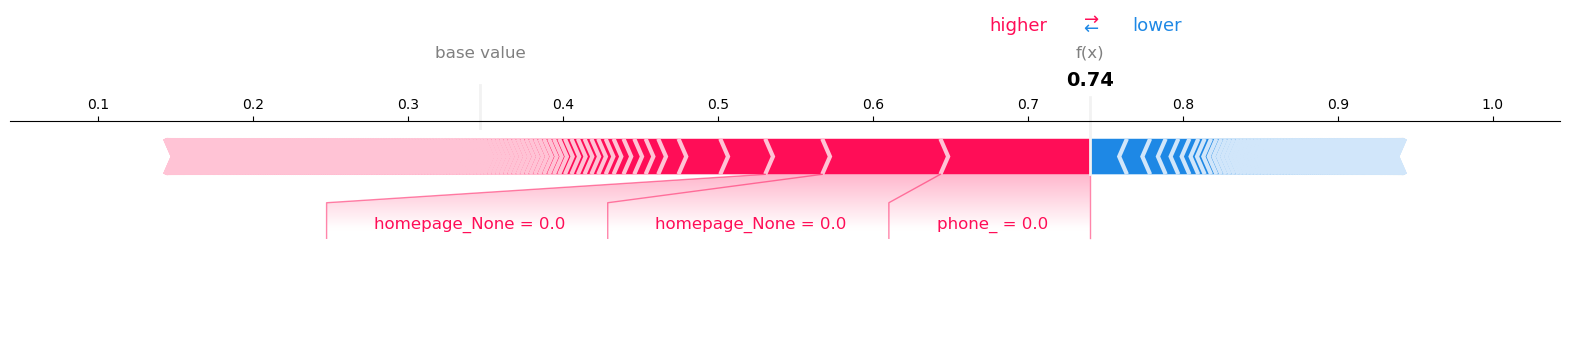

In [54]:
instance_idx = 1
instance_to_explain = X_test_enc_df.iloc[instance_idx]
class_index = 2  # change this for other classes
shap.force_plot(
    explainer.expected_value[class_index], 
    shap_values[class_index][instance_idx], 
    instance_to_explain,
    matplotlib=True  # use JS=False fallback for PNG instead of interactive JS
)
# actual class predicted for the instance

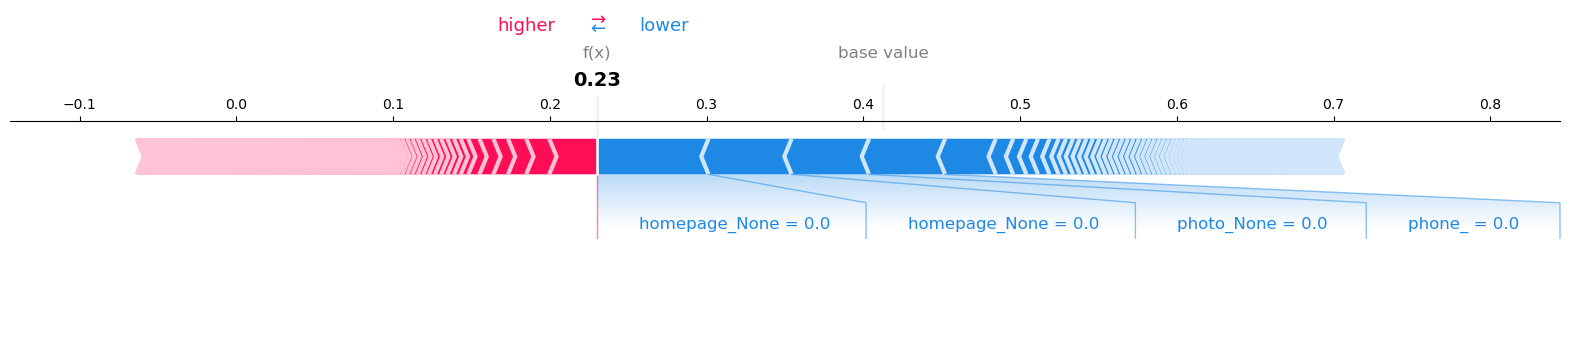

In [57]:
instance_idx = 2
instance_to_explain = X_test_enc_df.iloc[instance_idx]
class_index = 0  # change this for other classes
shap.force_plot(
    explainer.expected_value[class_index], 
    shap_values[class_index][instance_idx], 
    instance_to_explain,
    matplotlib=True  # use JS=False fallback for PNG instead of interactive JS
)
# wrong class used for the particular instance